In [1]:
import os
import random
import shutil

from PIL import Image
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data_path = "./data/birds-classification/train"
val_data_path = "./data/birds-classification/val"
test_data_path = "./data/birds-classification/test"

In [3]:
def retrieve_metadata(data_path: str):
    """ Retrieves basic metadata for images in select folder
    
    Args:
        data_path (str): path for data folder containing all class
            images
    
    Returns:
        pd.DataFrame obj of each image's file name, image dimension, 
            image pixel format(mode) and class
    
    """
    all_meta_data = {
        'file_name': [],
        'dimension': [],
        'mode': [],
        'class': []
    }

    for class_name in os.listdir(path=data_path):
        class_path = os.path.join(data_path, class_name)
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            image = Image.open(file_path)
            all_meta_data['file_name'].append(file_name)
            all_meta_data['dimension'].append(image.size)
            all_meta_data['mode'].append(image.mode)
            all_meta_data['class'].append(class_name)
    
    df = pd.DataFrame.from_dict(all_meta_data)
    
    return df

In [4]:
def print_dataset_stats(metadata: pd.DataFrame, dataset: str):
    """ Prints stats for given dataset metadata
    """
    print (f"dataset: {dataset}")
    print ("\n")
    
    print ("Metadata sample: ")
    pprint (metadata.head())
    print ("\n")
    
    print ("Number of unique classes: ", metadata['class'].nunique(), "\n")
    print ("Average number of images per class: ", metadata['class'].value_counts().mean(), "\n")    
    print ("Standard dev of number of images per class: ", metadata['class'].value_counts().std(), "\n")
    
    dimensions_vc = metadata['dimension'].value_counts()
    dimensions_vc_df = pd.DataFrame({"dimensions": dimensions_vc.index, "counts": dimensions_vc.values})
    print ("Image dimensions and counts: ")
    pprint (dimensions_vc_df)
    print ("\n")
    
    mode_vc = metadata['mode'].value_counts()
    mode_vc_df = pd.DataFrame({"mode": mode_vc.index, "counts": mode_vc.values})
    print ("Pixel format and counts: ")
    pprint (mode_vc_df)
    print ("\n")


In [5]:
train_meta = retrieve_metadata(train_data_path)
val_meta = retrieve_metadata(val_data_path)
test_meta = retrieve_metadata(test_data_path)

In [6]:
# Train dataset metadata
print_dataset_stats(train_meta, "train")

dataset: train


Metadata sample: 
  file_name   dimension mode            class
0   001.jpg  (224, 224)  RGB  ABBOTTS BABBLER
1   002.jpg  (224, 224)  RGB  ABBOTTS BABBLER
2   003.jpg  (224, 224)  RGB  ABBOTTS BABBLER
3   004.jpg  (224, 224)  RGB  ABBOTTS BABBLER
4   005.jpg  (224, 224)  RGB  ABBOTTS BABBLER


Number of unique classes:  400 

Average number of images per class:  145.97 

Standard dev of number of images per class:  21.87316136204195 

Image dimensions and counts: 
   dimensions  counts
0  (224, 224)   58388


Pixel format and counts: 
  mode  counts
0  RGB   58388




In [7]:
# Validation dataset metadata
print_dataset_stats(val_meta, "validation")

dataset: validation


Metadata sample: 
  file_name   dimension mode            class
0     1.jpg  (224, 224)  RGB  ABBOTTS BABBLER
1     2.jpg  (224, 224)  RGB  ABBOTTS BABBLER
2     3.jpg  (224, 224)  RGB  ABBOTTS BABBLER
3     4.jpg  (224, 224)  RGB  ABBOTTS BABBLER
4     5.jpg  (224, 224)  RGB  ABBOTTS BABBLER


Number of unique classes:  400 

Average number of images per class:  5.0 

Standard dev of number of images per class:  0.0 

Image dimensions and counts: 
   dimensions  counts
0  (224, 224)    2000


Pixel format and counts: 
  mode  counts
0  RGB    2000




In [8]:
# Test dataset metadata
print_dataset_stats(test_meta, "test")

dataset: test


Metadata sample: 
  file_name   dimension mode            class
0     1.jpg  (224, 224)  RGB  ABBOTTS BABBLER
1     2.jpg  (224, 224)  RGB  ABBOTTS BABBLER
2     3.jpg  (224, 224)  RGB  ABBOTTS BABBLER
3     4.jpg  (224, 224)  RGB  ABBOTTS BABBLER
4     5.jpg  (224, 224)  RGB  ABBOTTS BABBLER


Number of unique classes:  400 

Average number of images per class:  5.0 

Standard dev of number of images per class:  0.0 

Image dimensions and counts: 
   dimensions  counts
0  (224, 224)    2000


Pixel format and counts: 
  mode  counts
0  RGB    2000




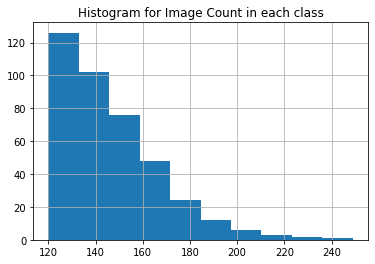

In [9]:
train_meta['class'].value_counts().hist()
plt.title("Histogram for Image Count in each class")
plt.show()

In [10]:
train_classes = set(train_meta['class'].unique())
val_classes = set(val_meta['class'].unique())
test_classes = set(test_meta['class'].unique())

In [11]:
# differences in unique classes set between train and validation set
train_classes.symmetric_difference(val_classes)

set()

In [12]:
# differences in unique classes set between train and test set
train_classes.symmetric_difference(test_classes)

set()

In [13]:
# differences in unique classes set between test and validation set
val_classes.symmetric_difference(test_classes)

set()

In [14]:
# Given that classes are consistent throughout
# we use original train dataset to split between the train/val/test for
# few shot learning

n_way = 5

all_classes = list(train_meta['class'].unique())

# classes to be in train set
train_sampled_class = random.sample(all_classes, int(len(all_classes)*0.9))

# classes to be in val set from remaining class set
for sample in train_sampled_class:
    all_classes.remove(sample)    
val_sampled_class = random.sample(all_classes, (len(all_classes)-n_way))

# classes to be test set
for sample in val_sampled_class:
    all_classes.remove(sample)
test_sampled_class = random.sample(all_classes, n_way)

In [15]:
new_data_path = "./data/birds-classification/few_shot_data"
os.mkdir(new_data_path, )

samples_dict = {
    "train": train_sampled_class,
    "val": val_sampled_class,
    "test": test_sampled_class
}

for split_set, split_sampled_class in samples_dict.items():
    # Create new folder for split set (train/val/test)
    split_set_path = os.path.join(new_data_path, split_set)
    os.mkdir(split_set_path)
    
    for sampled_class in split_sampled_class:
        dest_class_path = os.path.join(split_set_path, sampled_class)
        source_class_path = os.path.join(train_data_path, sampled_class)
        # create folder for class
        os.mkdir(dest_class_path)
        
        for file_name in os.listdir(source_class_path):
            dest_file_path = os.path.join(dest_class_path, file_name)
            source_file_path = os.path.join(source_class_path, file_name)
            # move files
            shutil.move(source_file_path, dest_file_path)

In [16]:
# Display sample image
# Sample 5 images to display for each class (10 random classes)

display_sample_images = {}
display_sample_class = random.sample(train_sampled_class, 5)
train_path = os.path.join(new_data_path, "train")

for class_name in display_sample_class:
    class_path = os.path.join(train_path, class_name)
    image_list = os.listdir(class_path)
    class_sample_images = random.sample(image_list, 5)
    display_sample_images[class_name] = class_sample_images

    
# generate image grid where each row is a class
# each column in a sample image
w, h = 128, 128
cols = 5
rows = 5
grid = Image.new('RGB', size=(cols*w, rows*h))

i = 0
for class_name, image_names in display_sample_images.items():
    for image_name in image_names:
        image_path = os.path.join(train_path, class_name, image_name)
        display_image = Image.open(image_path)
        diplay_image = display_image.resize((w,h))
        grid.paste(display_image, box=(i%cols*w, i//cols*h))
        i += 1
        
        # free process resource on image file
        del display_image

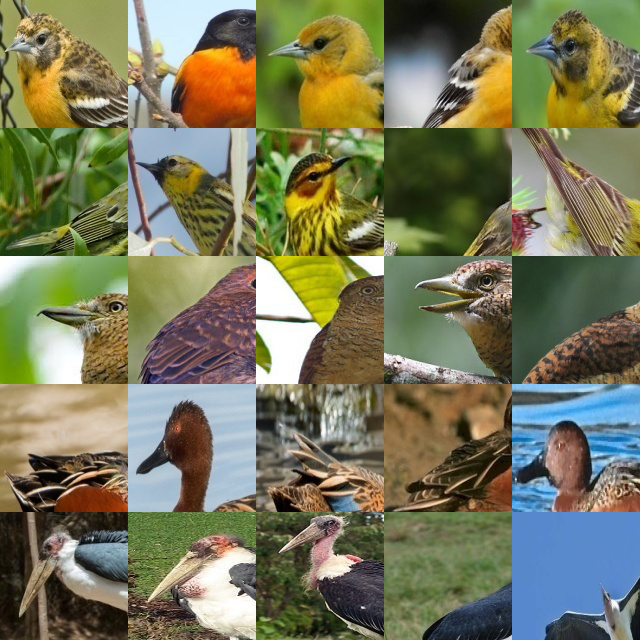

In [17]:
grid